In [10]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from matplotlib import cm
import itertools

In [8]:
#Helper Functions
class Functions:
    
    ## function for random sampling of data
    def random_sampler(self, perc=0.1):
        prop = int(len(self.X)*perc) #proportion of the data to be used for each iteration, here we have set it to 10% of the data
        ind = np.random.choice(range(len(self.X)), prop, replace=False)
        test_ind = list(set(range(len(self.X))) - set(ind)) #for using the rest sample as test set
        return self.X[ind],self.y[ind], self.X[test_ind], self.y[test_ind]
    
    ## funtion for normalizing the features
    def normalize_features(self,X,append=True):
        X = (X - np.mean(X, 0)) / np.std(X, 0) #normalize the features
        if append:
            X = np.append(np.ones(X.shape[0]).reshape(-1,1),X,1) #append column of ones for intercept
        return X

In [6]:
import numpy as np

class Ridge_Linear_Regression0():
    def __init__(self, X, y, iterations=100, alpha=0.01, lambda_ridge=0.1):
        self.X = X
        self.y = y.reshape(-1, 1)
        self.iterations = iterations
        self.alpha = alpha
        self.lambda_ridge = lambda_ridge
        self.theta = np.zeros((self.X.shape[1], 1))

    def fit(self):
        for _ in range(self.iterations):
            gradient = -(2/len(self.X)) * np.dot(self.X.T, (self.y - np.dot(self.X, self.theta)))
            ridge_penalty = 2 * self.lambda_ridge * self.theta
            self.theta = self.theta - self.alpha * (gradient + ridge_penalty)
        return self.theta

    def predict(self, X):
        y_hat = np.dot(X, self.theta)
        return y_hat

    def mse_loss(self, y, yhat):
        loss_value = np.mean((y - yhat) ** 2)  # Mean Squared Error
        return loss_value

    def ridge_mse_loss(self, y, yhat):
        loss_value = np.mean((y - yhat) ** 2) + self.lambda_ridge * np.sum(self.theta**2)
        return loss_value


In [7]:
import numpy as np
import matplotlib.pyplot as plt

class Ridge_Linear_Regression1():
    def __init__(self, X, y, iterations=100, alpha=0.01, lambda_ridge=0.1):
        self.X = X
        self.y = y.reshape(-1, 1)
        self.iterations = iterations
        self.alpha = alpha
        self.lambda_ridge = lambda_ridge
        self.theta = np.zeros((self.X.shape[1], 1))
        self.loss_history = []

    def fit(self):
        for _ in range(self.iterations):
            gradient = self.compute_gradient()
            self.update_parameters(gradient)
            loss = self.compute_loss()
            self.loss_history.append(loss)
        return self.theta

    def predict(self, X):
        y_hat = np.dot(X, self.theta)
        return y_hat

    def mse_loss(self, y, yhat):
        loss_value = np.mean((y - yhat) ** 2)  # Mean Squared Error
        return loss_value

    def ridge_mse_loss(self, y, yhat):
        loss_value = np.mean((y - yhat) ** 2) + self.lambda_ridge * np.sum(self.theta**2)
        return loss_value

    def compute_gradient(self):
        gradient = -(2/len(self.X)) * np.dot(self.X.T, (self.y - np.dot(self.X, self.theta)))
        ridge_penalty = 2 * self.lambda_ridge * self.theta
        gradient += ridge_penalty
        return gradient

    def update_parameters(self, gradient):
        self.theta -= self.alpha * gradient

    def compute_loss(self):
        yhat = np.dot(self.X, self.theta)
        loss = self.ridge_mse_loss(self.y, yhat)
        return loss

    def plot_loss_history(self):
        plt.plot(self.loss_history)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss over iterations')
        plt.show()


In [11]:
reg_data = pd.read_csv('regression.csv')
X,y = reg_data.iloc[:,:-1].values,reg_data.iloc[:,-1].values

## let's split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalize the features
X_train_normalized = Functions().normalize_features(X_train)
X_test_normalized = Functions().normalize_features(X_test)

In [12]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1599 non-null   float64
 1   X2      1599 non-null   float64
 2   X3      1599 non-null   float64
 3   X4      1599 non-null   float64
 4   X5      1599 non-null   float64
 5   X6      1599 non-null   float64
 6   X7      1599 non-null   float64
 7   X8      1599 non-null   float64
 8   X9      1599 non-null   float64
 9   X10     1599 non-null   float64
 10  X11     1599 non-null   float64
 11  Y       1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


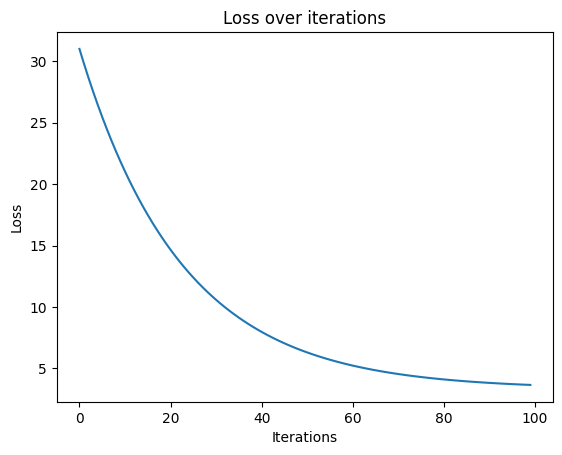

Mean Squared Error: 2.0970726386283745


In [14]:
model = Ridge_Linear_Regression1(X_train_normalized, y_train)

# Fit the model
learned_beta = model.fit()

# Plot loss history
model.plot_loss_history()

# Make predictions
y_pred = model.predict(X_test_normalized)

# Evaluate model performance
mse = model.mse_loss(y_test, y_pred)
print("Mean Squared Error:", mse)

In [26]:
import numpy as np

class LinearRegression2():
    def __init__(self, X, y, penalty=0):
        self.X = X
        self.y = y.reshape(-1,1)
        self.penalty = penalty
        
    def fit(self, max_iter=1000, tolerance=1e-6, lr=0.001):
        B = np.zeros((self.X.shape[1], 1))
        loss_list = []
        test_loss_list = []
        
        for it in range(max_iter):
            x, y, x_val, y_val = self.random_sampler()
            y = y.reshape(-1,1)
            y_val = y_val.reshape(-1,1)
            
            curr_loss, derv_loss, _ = self.mean_square_loss(x, y, B)
            loss_list.append(curr_loss)
            
            curr_loss_test, _, _ = self.mean_square_loss(x_val, y_val, B)
            test_loss_list.append(curr_loss_test)
            
            e = lr * derv_loss
            B = B - e
            
            if np.all(np.abs(e) < tolerance):
                break
        
        self.B = B  # Store learned parameters
        return B, loss_list, test_loss_list
    
    def predict(self, X):
        return np.matmul(X, self.B)  # Use learned parameters for prediction
    
    def mse(self, X, y, betas):
        pred = np.dot(X, betas)
        return np.mean((y - pred) ** 2)
    
    def l1_with_mse(self, X, y, betas):
        l1_loss = self.penalty * np.sum(np.abs(betas))
        return self.mse(X, y, betas) + l1_loss
    
    def l2_with_mse(self, X, y, betas):
        l2_loss = 0.5 * self.penalty * np.sum(np.square(betas))
        return self.mse(X, y, betas) + l2_loss
    
    def elastic_net(self, X, y, betas):
        p = 1. / (1 + np.exp(-np.dot(X, betas)))
        loss = (-1 / len(X) * (np.dot(y.T, np.log(p)) + np.dot(np.transpose(1 - y), np.log(1 - p))) + self.penalty * np.sum(np.abs(betas)) + self.penalty * betas.T.dot(betas))[0][0]
        return loss
    
    def mean_square_loss(self, X, y, betas):
        pred = np.dot(X, betas)
        mse_loss = np.mean((y - pred) ** 2)
        gradient = (-2.0 / len(X)) * X.T.dot(y - X.dot(betas))
        hessian = 1 / len(X) * np.matmul(X.T, X)
        return mse_loss, gradient, hessian
    
    def random_sampler(self):
        # Implement your random sampling logic here
        indices = np.random.choice(len(self.X), size=len(self.X), replace=False)
        half = len(indices) // 2
        train_idx, val_idx = indices[:half], indices[half:]
        x_train, y_train = self.X[train_idx], self.y[train_idx]
        x_val, y_val = self.X[val_idx], self.y[val_idx]
        return x_train, y_train, x_val, y_val


model_l2 = LinearRegression2(X_train_normalized, y_train)

# Fit the model
learned_beta, loss, test_loss = model_l2.fit()

# Make predictions
y_pred = model_l2.predict(X_test_normalized)

# Evaluate model performance
mse = model_l2.mse(X_test_normalized, y_test, learned_beta)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.5228508247339816


In [28]:
model_l2=LinearRegression2(X_train_normalized, y_train)

# Fit the model
learned_beta, loss, test_loss = model_l2.fit()


# Make predictions
y_pred = model_l2.predict(X_test_normalized)

# Evaluate model performance
mse = model_l2.mse(X_test_normalized, y_test, learned_beta)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5242282546326065


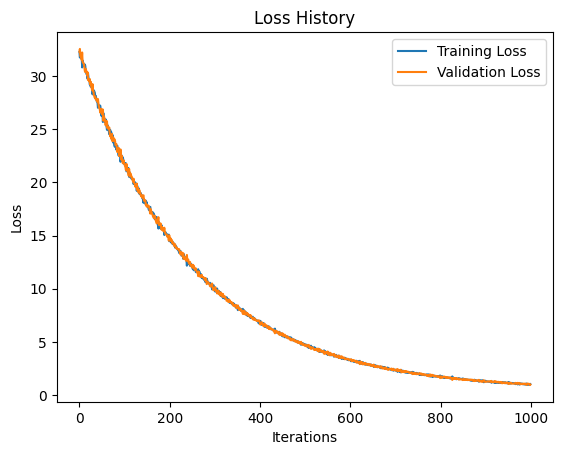

In [29]:
# Plot loss history
plt.plot(loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.show()

### closed form solution

In [30]:
import numpy as np

class RidgeRegScratch():
  # include solver parameter for flexible implementation of gradient descent
  # solution in future, alpha is used in place of lambda to mimic scikit-learn
  def __init__(self, alpha=1.0, solver='closed'):
      self.alpha = alpha
      self.solver = solver

  def fit(self, X, y):
      X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
      self.X_intercept = X_with_intercept
      if self.solver == 'closed':
          # number of columns in matrix of X including intercept
          dimension = X_with_intercept.shape[1]
          # Identity matrix of dimension compatible with our X_intercept Matrix
          A = np.identity(dimension)
          # set first 1 on the diagonal to zero so as not to include a bias term for
          # the intercept
          A[0, 0] = 0
          # We create a bias term corresponding to alpha for each column of X not
          # including the intercept
          A_biased = self.alpha * A
          thetas = np.linalg.inv(X_with_intercept.T.dot(
              X_with_intercept) + A_biased).dot(X_with_intercept.T).dot(y)
      self.thetas = thetas
      return self

  def predict(self, X):
      thetas = self.thetas
      X_predictor = np.c_[np.ones((X.shape[0], 1)), X]
      self.predictions = X_predictor.dot(thetas)
      return self.predictions